In [90]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from folium.plugins import MarkerCluster
import folium

In [91]:
df = pd.read_csv('survey.csv')
df

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73263,73264,I am a developer by profession,"Employed, full-time",Fully remote,Freelance/contract work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Blogs;Written Tutorial...,Udemy,8,...,30-60 minutes a day,Less than 15 minutes a day,Just right,DevOps function;Microservices;Developer portal...,Yes,Yes,Yes,Too long,Easy,NaN
73264,73265,I am a developer by profession,"Employed, full-time",Full in-person,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,Coursera;Udemy;Udacity,6,...,15-30 minutes a day,60-120 minutes a day,Very long,None of these,No,Yes,Yes,Too long,Easy,NaN
73265,73266,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Programming Games;Stac...,Udemy;Codecademy;Pluralsight;edX,42,...,30-60 minutes a day,60-120 minutes a day,Just right,None of these,No,No,No,Appropriate in length,Easy,NaN
73266,73267,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;On the job training,NaN,NaN,50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN


In [92]:
df.shape

(73268, 79)

In [93]:
df.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'Country', 'Currency',
       'CompTotal', 'CompFreq', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysProfessional use',
       'OpSysPersonal use', 'VersionControlSystem', 'VCInteraction',
       'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWork

In [94]:
df = df[['LanguageHaveWorkedWith','WebframeHaveWorkedWith','DatabaseHaveWorkedWith']]

In [95]:
df.head(2)


,LanguageHaveWorkedWith,WebframeHaveWorkedWith,DatabaseHaveWorkedWith
0,NaN,NaN,NaN
1,JavaScript;TypeScript,NaN,NaN


In [96]:
df['LanguageHaveWorkedWith'].value_counts()


HTML/CSS;JavaScript;TypeScript                                                              1250
Python                                                                                       962
HTML/CSS;JavaScript                                                                          914
HTML/CSS;JavaScript;PHP;SQL                                                                  745
C#;HTML/CSS;JavaScript;SQL;TypeScript                                                        570
                                                                                            ... 
C#;Java;JavaScript;PHP;PowerShell;SQL;TypeScript                                               1
C++;HTML/CSS;JavaScript;Python;Solidity;SQL                                                    1
Dart;Haskell;HTML/CSS;Java;R;SQL;TypeScript                                                    1
Bash/Shell;C;C#;Go;HTML/CSS;Java;JavaScript;Lua;Perl;PHP;Python;Ruby;Rust;SQL;TypeScript       1
C#;JavaScript;Lua;PowerShell;S

In [97]:
df['WebframeHaveWorkedWith'].value_counts()


React.js                                                                 1959
Node.js                                                                  1507
jQuery                                                                   1445
Node.js;React.js                                                         1303
Flask                                                                    1258
                                                                         ... 
ASP.NET;Deno;Django;Express;Flask;jQuery;Node.js;React.js                   1
ASP.NET;Drupal;Express;FastAPI;jQuery;Laravel;Node.js;React.js;Vue.js       1
ASP.NET Core ;Blazor;Django;Express;Node.js;React.js                        1
Django;Drupal;Flask;jQuery;Laravel;Node.js;React.js;Ruby on Rails           1
Angular.js;Express;jQuery;Next.js;Node.js;Play Framework;React.js           1
Name: WebframeHaveWorkedWith, Length: 8259, dtype: int64

In [98]:
# check if JavaScript has been mentioned in the answers
jsbool = df['LanguageHaveWorkedWith'].str.contains('JavaScript')


In [99]:
# Checking the percentage of JS mention or not mention
jsbool.value_counts(normalize=True)


True     0.654357
False    0.345643
Name: LanguageHaveWorkedWith, dtype: float64

In [100]:
# splitting the language values based on semicolon and putting them in different columns
languages = df['LanguageHaveWorkedWith'].str.split(';', expand=True)


In [101]:
languages.head()


,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,JavaScript,TypeScript,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,C#,C++,HTML/CSS,JavaScript,Python,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,C#,JavaScript,SQL,TypeScript,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,C#,HTML/CSS,JavaScript,SQL,Swift,TypeScript,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [102]:
# stacking the languages, counting the values, and saving the first 20 ones in first_20
first_20 = languages.stack().value_counts().head(20)

<AxesSubplot: >

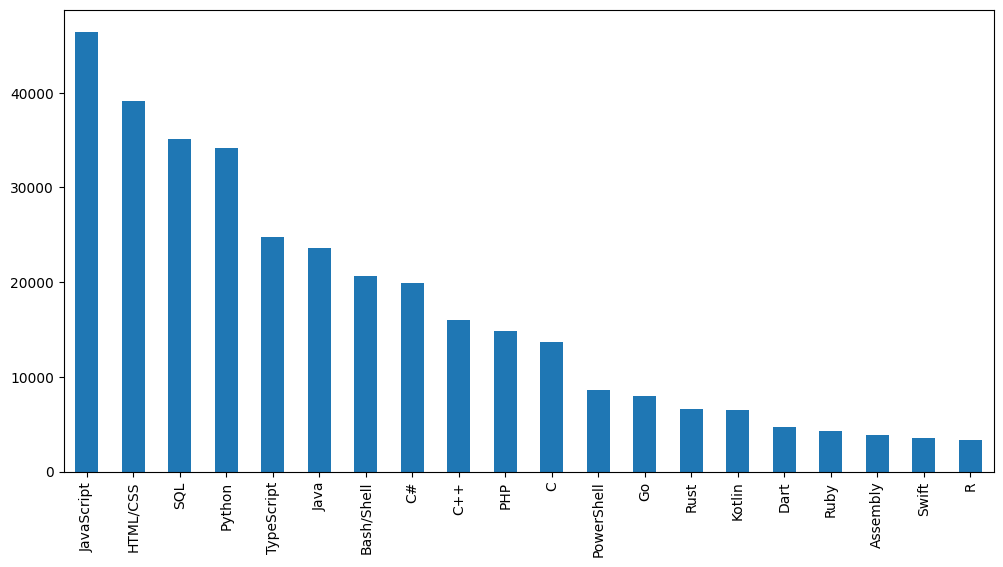

In [103]:
# creating a bar chart and changing the size of the chart
first_20.plot(kind='bar', figsize=(12, 6))


In [104]:
m = folium.Map(location=[63.391522, 96.328125], zoom_start=3)


In [105]:
hotels = pd.read_csv('ski_hotels.csv')
hotels


,Unnamed: 0,country,resort,hotel,price,distance_from_lift_(m),altitude (m),totalPiste (km),totalLifts,gondolas,...,blacks,totalRuns,link,sleeps,decSnowLow2020(cm),decSnowHigh2020(cm),janSnowLow2020(cm),janSnowHigh2020(cm),febSnowLow2020(cm),febSnowHigh2020(cm)
0,0,italy,bardonecchia,residence-tabor,550,unknown,1312,140,23,0,...,1.0,42.0,https://www.igluski.com/ski-resorts/italy/bard...,unknown,70,170,60,200,47,177
1,1,italy,bardonecchia,residence-villa-frejus,561,unknown,1312,140,23,0,...,1.0,42.0,https://www.igluski.com/ski-resorts/italy/bard...,unknown,70,170,60,200,47,177
2,2,bulgaria,bansko,hotel-mura,566,1100,935,70,24,1,...,1.0,14.0,https://www.igluski.com/ski-resorts/bulgaria/b...,140,0,70,5,75,5,77
3,3,bulgaria,borovets,hotel-samokov,574,75,1390,58,18,1,...,1.0,15.0,https://www.igluski.com/ski-resorts/bulgaria/b...,590,0,0,160,200,194,246
4,4,bulgaria,bansko,hotel-lion---bansko,596,800,935,70,24,1,...,1.0,14.0,https://www.igluski.com/ski-resorts/bulgaria/b...,386,0,70,5,75,5,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,402,france,val-thorens,hotel-fitz-roy,2216,unknown,2300,600,183,40,...,32.0,321.0,https://www.igluski.com/ski-resorts/france/val...,112,98,121,215,267,207,269
403,403,austria,ischgl,hotel-fliana,2258,unknown,1400,230,48,9,...,15.0,98.0,https://www.igluski.com/ski-resorts/austria/is...,30,20,70,50,120,63,131
404,404,austria,ischgl,hotel-elisabeth,2420,unknown,1400,230,48,9,...,15.0,98.0,https://www.igluski.com/ski-resorts/austria/is...,110,20,70,50,120,63,131
405,405,austria,ischgl,hotel-trofana-royal,2484,unknown,1400,230,48,9,...,15.0,98.0,https://www.igluski.com/ski-resorts/austria/is...,164,20,70,50,120,63,131


<AxesSubplot: title={'center': 'Resort price by countries'}>

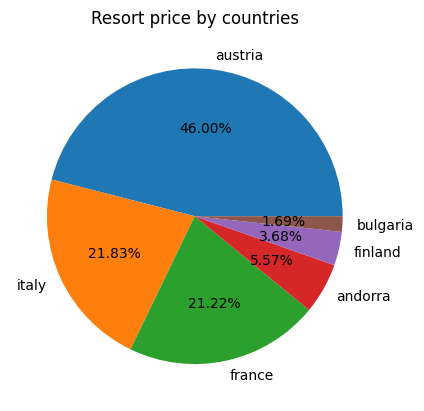

In [106]:
hotels.groupby(by=['country'])['price'].sum().sort_values(ascending=False).plot(label="", kind="pie", autopct='%1.2f%%', title = "Resort price by countries")


In [107]:
NY_map = folium.Map(location=[41.6, -77.42], zoom_start=7)
NY_map

In [108]:
Ind_df = pd.read_csv('Indian Cities Database.csv')
Ind_df

,City,Lat,Long,country,iso2,State
0,Abohar,30.144533,74.195520,India,IN,Punjab
1,Adilabad,19.400000,78.310000,India,IN,Telangana
2,Agartala,23.836049,91.279386,India,IN,Tripura
3,Agra,27.187935,78.003944,India,IN,Uttar Pradesh
4,Ahmadnagar,19.094571,74.738432,India,IN,Maharashtra
...,...,...,...,...,...,...
208,Vizianagaram,18.113290,83.397743,India,IN,Andhra Pradesh
209,Warangal,17.978423,79.600209,India,IN,Telangana
210,Jorapokhar,23.700000,86.412670,India,IN,Jharkhand
211,Brajrajnagar,21.820000,83.920000,India,IN,Odisha


In [109]:
Ind_map = folium.Map(location=[20.5936, 78.9628], zoom_start=5, tiles='cartodbpositron')

In [110]:
cities = MarkerCluster().add_to(Ind_map) # Кластер

for index, city in Ind_df.iterrows():
    folium.Marker(location = [city["Lat"], city["Long"]], popup=city["City"]).add_to(cities)
Ind_map.add_child(cities)


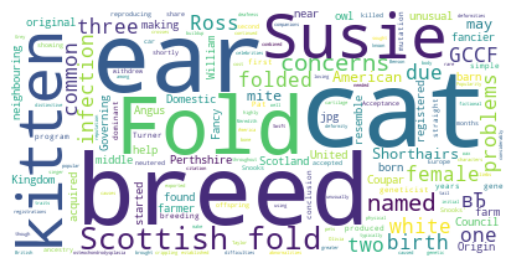

In [111]:
from wordcloud import STOPWORDS, WordCloud

kitty =  open('Cats.txt', 'r').read()

stopwords = set(STOPWORDS)

# створюємо екземпляр об'єкта WordCloud
kitty_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# згенеруйте хмару слів
kitty_wc.generate(kitty)

plt.imshow(kitty_wc, interpolation='bilinear')
plt.axis('off')
plt.show()


Image downloaded and saved!


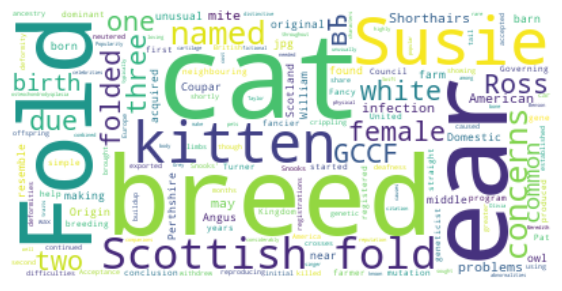

In [112]:
import numpy as np
from PIL import Image

# зберігаємо маску
kitty_mask = np.array(Image.open('cat.png'))

print('Image downloaded and saved!')

# генеруємо словохмару
kitty_wc.generate(kitty)

# Візуалізуємо словохмару
fig = plt.figure()
fig.set_figwidth(7) # встановлюємо ширину
fig.set_figheight(9) # встановлюємо висоту

plt.imshow(kitty_wc, interpolation='bilinear')
plt.axis('off')
plt.show()



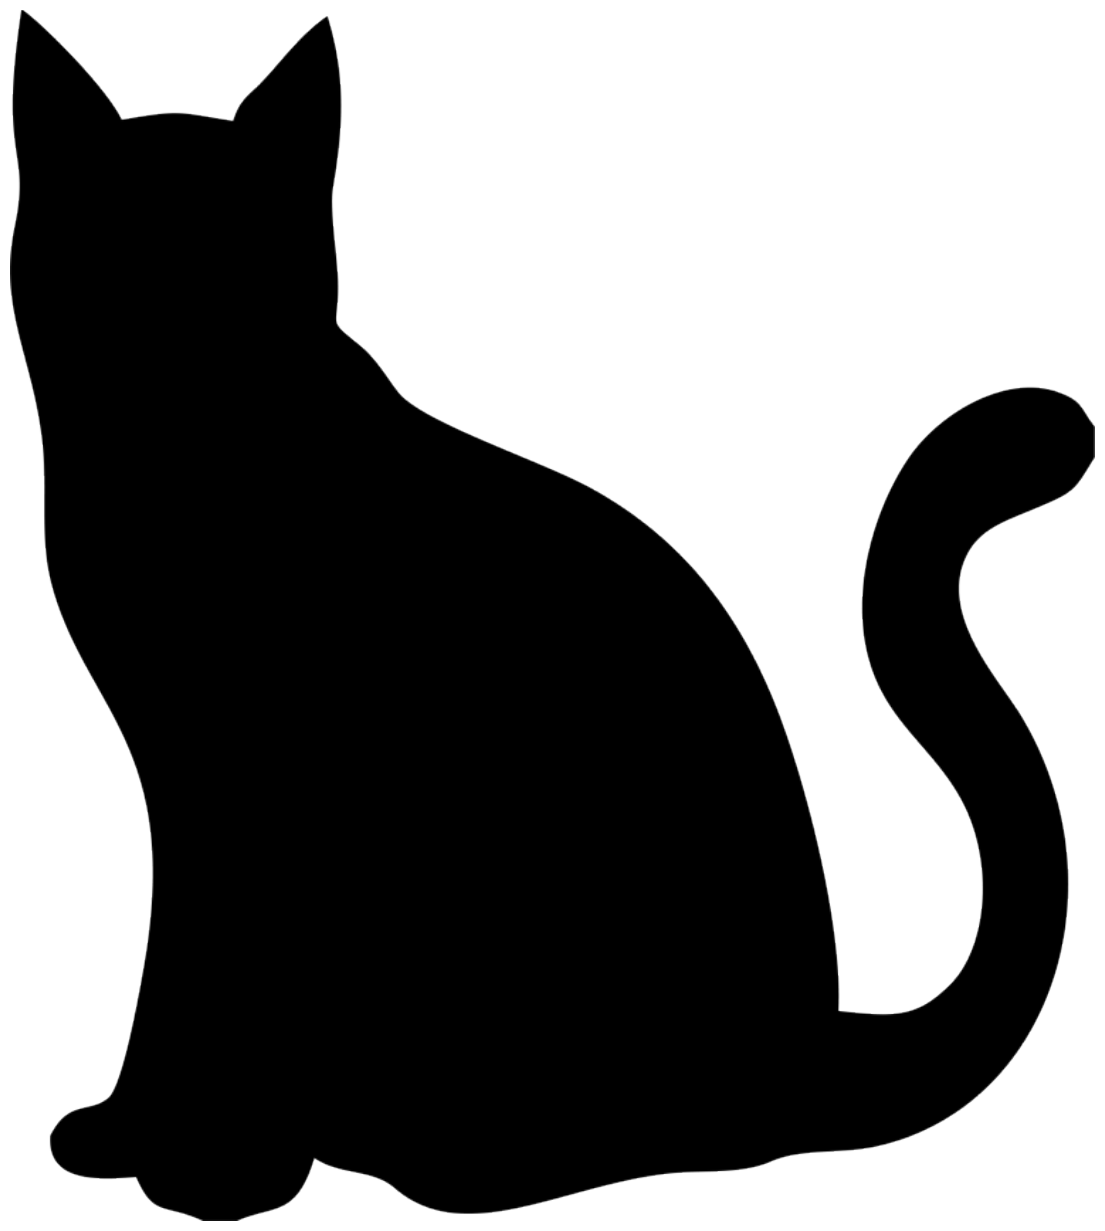

In [113]:
fig = plt.figure()
fig.set_figwidth(14) # встановіть ширину
fig.set_figheight(18) # встановіть висоту

plt.imshow(kitty_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()


In [114]:
stopwords = set(STOPWORDS)

Cat_wc = WordCloud(background_color='white', max_words=2000, stopwords=stopwords)

Cat = open("cats.txt", 'r').read()
Cat_wc.generate(Cat)


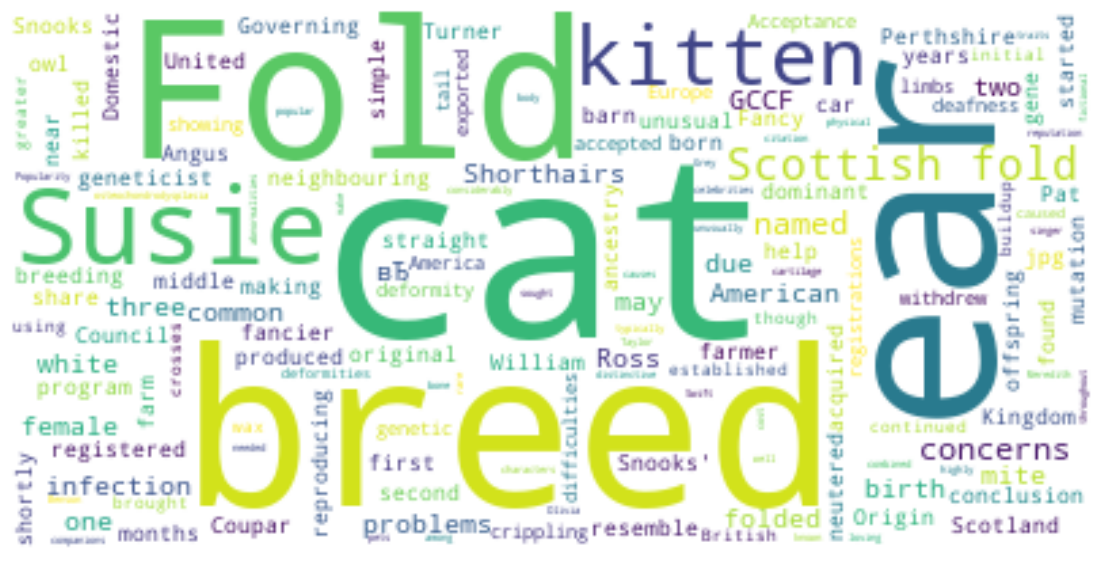

In [115]:
fig = plt.figure()
fig.set_figwidth(14) # встановити ширину рисунку
fig.set_figheight(18) # встановити висоту рисунку
plt.imshow(Cat_wc, interpolation='bilinear')
plt.axis('off')
plt.show()


Image downloaded and saved!


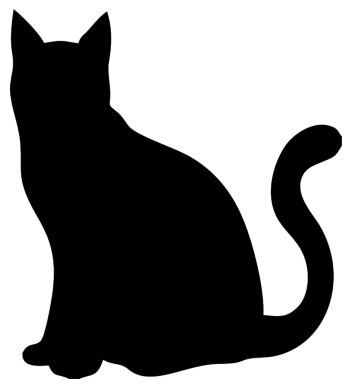

In [116]:
#накладемо на створену хмару слів маску
Cat_mask = np.array(Image.open('cat.png'))
fig = plt.figure()
print('Image downloaded and saved!')
plt.imshow(Cat_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()


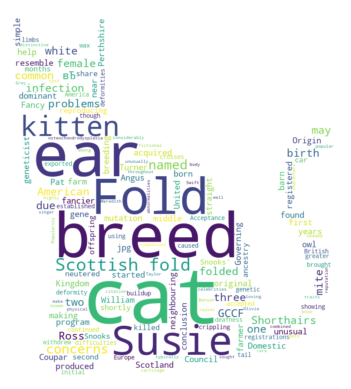

In [117]:

Cat_wc = WordCloud(background_color='white', max_words=2000, mask=Cat_mask, stopwords=stopwords)
Cat_wc.generate(Cat)

fig.set_figwidth(14) # встановлюємо ширину
fig.set_figheight(16) # встановлюємо висоту

fig = plt.figure()
plt.imshow(Cat_wc, interpolation='bilinear')
plt.axis('off')
plt.show()


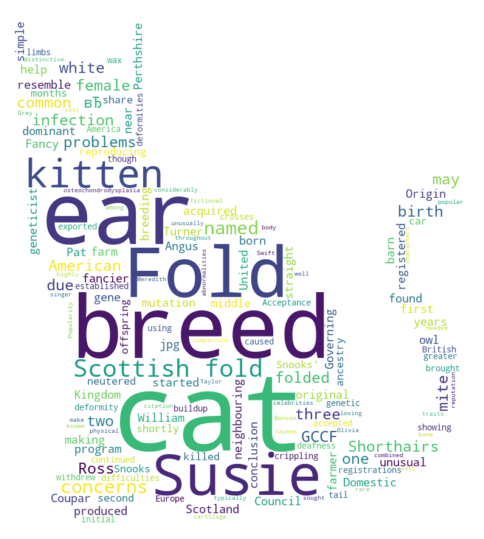

In [118]:
alice_mask = np.array(Image.open('alice_mask.png'))

fig = plt.figure()
fig.set_figwidth(6) # встановлюємо ширину
fig.set_figheight(8) # встановлюємо висоту

plt.imshow(Cat_wc, interpolation='bilinear')
plt.axis('off')
plt.show()


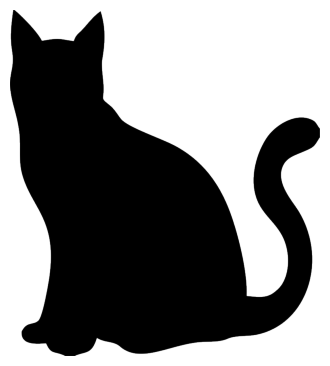

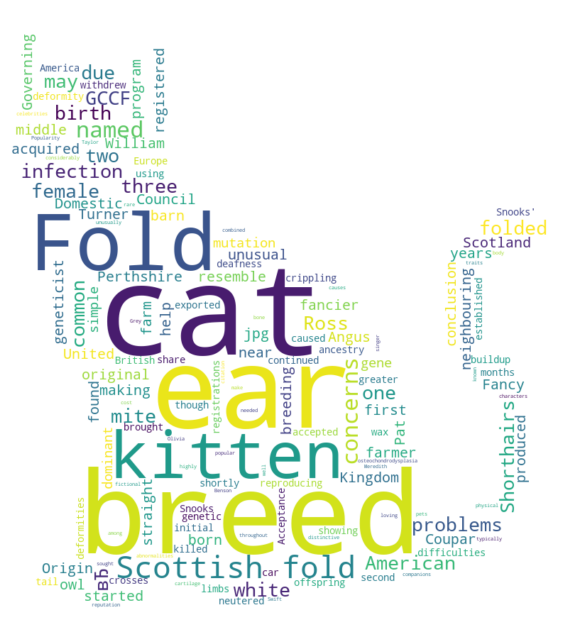

In [120]:
cat_mask = np.array(Image.open('cat.png'))

stopwords.add('Susie')

fig = plt.figure()
fig.set_figwidth(4) # встановіть ширину
fig.set_figheight(6) # встановіть висоту

plt.imshow(cat_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

cat = open("cats.txt", 'r').read()

cat_wc = WordCloud(background_color='white', max_words=2000, mask=cat_mask, stopwords=stopwords)

# генеруємо словохмару
cat_wc.generate(cat)

# Візуалізуємо словохмару
fig = plt.figure()
fig.set_figwidth(7) # встановлюємо ширину
fig.set_figheight(9) # встановлюємо висоту

plt.imshow(cat_wc, interpolation='bilinear')
plt.axis('off')
plt.show()
